# OpenStreetMap

In [1]:
from IPython.display import YouTubeVideo

## 📖 Ahead of time...

This session is all about OpenStreetMap. To provide an overview of what the project is, whether you have never heard of it or you are somewhat familiar, the followring will set your mind "on course":

- The following short clip provides a general overview of what OpenStreetMap is

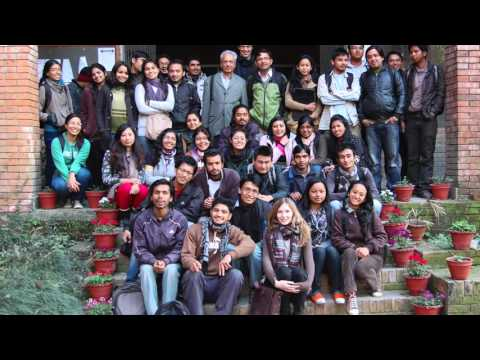

In [2]:
YouTubeVideo(
    "Phwrgb16oEM", width=700, height=300
)

- [This recent piece](https://joemorrison.medium.com/openstreetmap-is-having-a-moment-dcc7eef1bb01) contains several interesting points about how OpenStreetMap is currently being created and some of the implications this model may have.
- Anderson et al. (2019) {cite}`anderson2019corporate` provides some of the academic underpinnings to the views expressed in Morrison's piece

## 💻 Hands-on coding

In [3]:
import geopandas
import contextily
from IPython.display import GeoJSON

Since some of the query options we will discuss involve pre-defined extents, we will read the Madrid neighbourhoods dataset first:


````{tabbed} Local files

Assuming you have the file locally on the path `../data/`: 

```python
neis = geopandas.read_file("../data/neighbourhoods.geojson")
```
````

````{tabbed} Online read

If you're online, you can do:

```python
neis = geopandas.read_file(
    "http://darribas.org/gds4ae/_downloads/44b4bc22c042386c2c0f8dc6685ef17c/neighbourhoods.geojson"
)
```
````


In [4]:
neis = geopandas.read_file("../data/neighbourhoods.geojson")

To make some of the examples below *easy* on OpenStreetMap servers, we will single out the smallest neighborhood:

In [5]:
areas = neis.to_crs(
    epsg=32630
).area

smallest = neis[areas == areas.min()]
smallest

,neighbourhood,neighbourhood_group,geometry
98,Atalaya,Ciudad Lineal,"MULTIPOLYGON (((-3.66195 40.46338, -3.66364 40..."


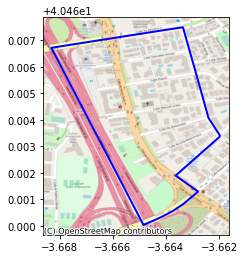

In [6]:
ax = smallest.plot(
    facecolor="none", edgecolor="blue", linewidth=2
)
contextily.add_basemap(
    ax, 
    crs=smallest.crs, 
    source=contextily.providers.OpenStreetMap.Mapnik
);

### `osmnx`

In [7]:
import osmnx as ox

```{margin}
Here is a trick to pin all your queries to OpenStreetMap to a specific date, so results are always reproducible, even if the map changes in the meantime.

Tip courtesy of [Martin Fleischmann](https://martinfleischmann.net/).
```

In [8]:
ox.config(
    overpass_settings='[out:json][timeout:90][date:"2021-03-07T00:00:00Z"]'
)

```{tip}
Much of the methods covered here rely on the `osmnx.geometries` module. Check out its reference [here](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.geometries)
```

There are two broad areas to keep in mind when querying data on OpenStreetMap through `osmnx`:

- The interface to specify the *extent* of the search

- The *nature* of the entities being queried. Here, the interface relies entirely on OpenStreetMap's tagging system. Given the distributed nature of the project, this is variable, but a good place to start is:

> [https://wiki.openstreetmap.org/wiki/Tags](https://wiki.openstreetmap.org/wiki/Tags)



Generally, the interface we will follow involves the following:

```python
received_entities = ox.geometries_from_XXX(
    <extent>, tags={<key>: True/<value(s)>}, ...
)
```

The `<extent>` can take several forms:

In [9]:
[i for i in dir(ox) if "geometries_from_" in i]

['geometries_from_address',
 'geometries_from_bbox',
 'geometries_from_place',
 'geometries_from_point',
 'geometries_from_polygon',
 'geometries_from_xml']

The `tags` follow the [official feature spec](https://wiki.openstreetmap.org/wiki/Map_features).

### Buildings

In [10]:
blgs = ox.geometries_from_polygon(
    smallest.squeeze().geometry, tags={"building": True}
)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


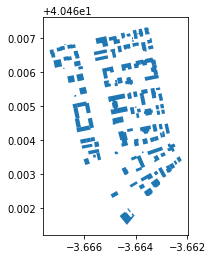

In [11]:
blgs.plot();

In [12]:
blgs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   unique_id         115 non-null    object  
 1   osmid             115 non-null    int64   
 2   element_type      115 non-null    object  
 3   amenity           2 non-null      object  
 4   name              2 non-null      object  
 5   geometry          115 non-null    geometry
 6   nodes             115 non-null    object  
 7   building          115 non-null    object  
 8   addr:housenumber  21 non-null     object  
 9   addr:postcode     3 non-null      object  
 10  addr:street       9 non-null      object  
 11  denomination      1 non-null      object  
 12  phone             2 non-null      object  
 13  religion          1 non-null      object  
 14  source            1 non-null      object  
 15  source:date       1 non-null      object  
 16  url               

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
blgs.head()

,unique_id,osmid,element_type,amenity,name,geometry,nodes,building,addr:housenumber,addr:postcode,...,addr:country,country,diplomatic,name:en,name:fr,name:ko,office,target,website,wikidata
0,way/442595762,442595762,way,NaN,NaN,"POLYGON ((-3.66377 40.46317, -3.66363 40.46322...","[4402722774, 4402722775, 4402722776, 440272277...",yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way/442595763,442595763,way,NaN,NaN,"POLYGON ((-3.66394 40.46346, -3.66415 40.46339...","[4402722778, 4402722779, 4402722780, 440272278...",yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way/442595764,442595764,way,NaN,NaN,"POLYGON ((-3.66379 40.46321, -3.66401 40.46314...","[4402722782, 4402722783, 4402722784, 440272278...",yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/442595765,442595765,way,NaN,NaN,"POLYGON ((-3.66351 40.46356, -3.66294 40.46371...","[4402722786, 4402722787, 4402722788, 440272278...",yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/442596830,442596830,way,NaN,NaN,"POLYGON ((-3.66293 40.46289, -3.66281 40.46294...","[4402729658, 4402729659, 4402729660, 440272966...",yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If you want to visit the entity online, you can do so at:

> `https://www.openstreetmap.org/<unique_id>`

### Other polygons

In [14]:
park = ox.geometries_from_place(
    "Parque El Retiro, Madrid", tags={"leisure": "park"}
)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


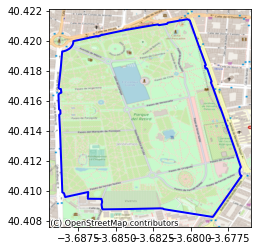

In [15]:
ax = park.plot(
    facecolor="none", edgecolor="blue", linewidth=2
)
contextily.add_basemap(
    ax, 
    crs=smallest.crs, 
    source=contextily.providers.OpenStreetMap.Mapnik
);

### Points of interest

Bars around Atocha station:

In [16]:
bars = ox.geometries_from_address(
    "Madrid Puerta de Atocha", tags={"amenity": "bar"}, dist=1500
)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We can quickly explore with `GeoJSON`:

In [17]:
GeoJSON(bars.__geo_interface__)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.display.GeoJSON object>

And stores within Malasaña:

In [18]:
shops = ox.geometries_from_address(
    "Malasaña, Madrid, Spain", # Boundary to search within
    tags={
        "shop": True,
        "landuse": ["retail", "commercial"],
        "building": "retail"
    },
    dist=1000
)

We use `geometries_from_place` for delineated areas ("polygonal entities"):

In [19]:
cs = ox.geometries_from_place(
    "Madrid, Spain",
    tags={"amenity": "charging_station"}
)
GeoJSON(cs.__geo_interface__)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.display.GeoJSON object>

Similarly, we can work with location data. For example, searches around a given point:

In [20]:
bakeries = ox.geometries_from_point(
    (40.418881103417675, -3.6920446157455444),
    tags={"shop": "bakery", "craft": "bakery"},
    dist=500
)
GeoJSON(bakeries.__geo_interface__)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.display.GeoJSON object>

### Streets

Street data can be obtained as another type of entity, as above; or as a graph object.

#### Geo-tables

In [21]:
centro = ox.geometries_from_polygon(
    neis.query("neighbourhood == 'Sol'").squeeze().geometry,
    tags={"highway": True}
)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We can get a quick peak into what is returned (grey), compared to the region we used for the query:

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


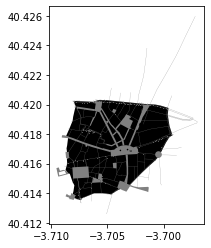

In [22]:
ax = neis.query(
    "neighbourhood == 'Sol'"
).plot(color="k")
centro.plot(
    ax=ax, 
    color="0.5", 
    linewidth=0.2, 
    markersize=0.5
);

This however will return all sorts of things:

In [23]:
centro.geometry

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                              POINT (-3.70427 40.41662)
1                              POINT (-3.70802 40.41612)
2                              POINT (-3.70847 40.41677)
3                              POINT (-3.69945 40.41786)
4                              POINT (-3.70054 40.41645)
                             ...                        
604    LINESTRING (-3.70686 40.41380, -3.70719 40.41369)
605    LINESTRING (-3.70705 40.42021, -3.70680 40.42020)
606    POLYGON ((-3.70948 40.41551, -3.70952 40.41563...
607    POLYGON ((-3.70243 40.41716, -3.70242 40.41714...
608    POLYGON ((-3.70636 40.41475, -3.70635 40.41481...
Name: geometry, Length: 609, dtype: geometry

#### Spatial graphs

This returns clean, processed *graph* objects for the street network:

In [24]:
[i for i in dir(ox) if "graph_from_" in i]

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['graph_from_address',
 'graph_from_bbox',
 'graph_from_gdfs',
 'graph_from_place',
 'graph_from_point',
 'graph_from_polygon',
 'graph_from_xml']

In [25]:
centro_gr = ox.graph_from_polygon(
    neis.query("neighbourhood == 'Sol'").squeeze().geometry,
)

```{note}
For more on graph representations of street networks, see [block 07](07-Spatial_networks)
```

In [26]:
centro_gr

And to visualise it:

In [27]:
[i for i in dir(ox) if "plot_graph" in i]

['plot_graph', 'plot_graph_folium', 'plot_graph_route', 'plot_graph_routes']

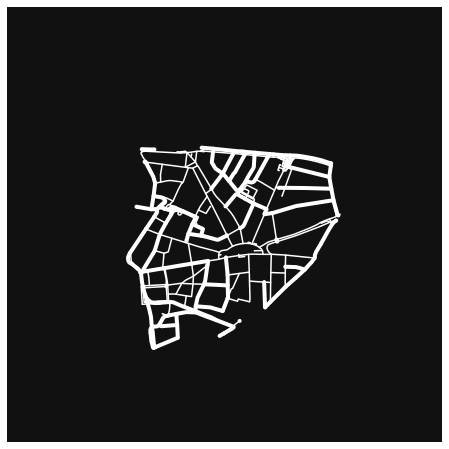

In [28]:
ox.plot_figure_ground(centro_gr);

In [29]:
ox.plot_graph_folium(centro_gr)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### `pyrosm`

If you are planning to read full collections of OpenStreetMap entities for a given region, `osmnx` might not be the ideal tool. Instead, it is possible to access extracts of regions and read them in full with [`pyrosm`](https://pyrosm.readthedocs.io/en/latest/index.html), which is faster for *these* operations.

```{margin}
More information about the `pyrosm` project is available on its [website](https://pyrosm.readthedocs.io/)
```

In [30]:
import pyrosm

If you are working on a "popular" place, there are utilities to acquire the data:

In [31]:
mad = pyrosm.get_data("Madrid")
mad

'/tmp/pyrosm/Madrid.osm.pbf'

Once downloaded, we can start up the database:

In [32]:
mad_osm = pyrosm.OSM(mad)

And we can then read parts of all of OpenStreetMap data available for Madrid through queries to `mad_osm`. It is important to note that `pyrosm` will return queries as `GeoDataFrame` objects, but can also interoperate with graph data structures.

### Over to you...

The best way to get a hang on OpenStreetMap tags is by playing with it yourself. To facilitate just that, here are some challenges to get you started.

```{admonition} Challenges

- Extract the building footprints for the Sol neighbourhood in `neis`
- How many music shops does OSM record within 750 metres of Puerta de Alcalá?
- Are there more restaurants or clothing shops within the polygon that represents the Pacífico neighbourhood in `neis` table?
- How many bookshops are within a 50m radious of the Paseo de la Castellana? (**NOTE** this one involves extracting the street segment, [drawing a buffer](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.buffer.html?highlight=buffer#geopandas.GeoSeries.buffer) and querying OSM for bookshops)

```

## 🐾 Next steps

If you found the content in this block useful, the following resources represent some suggestions on where to go next:

- Parts of the block are inspired and informed by Geoff Boeing's excellent [course on Urban Data Science](https://github.com/gboeing/ppd599)
- More in depth content about `osmnx` is available in the [official examples collection](https://github.com/gboeing/osmnx-examples)
- Boeing (2020) {cite}`boeing2020exploring` illustrates how OpenStreetMap can be used to analyse urban form ([Open Access](https://osf.io/preprints/socarxiv/rnwgv/))